In [6]:
from sklearn.datasets import load_digits
mnist = load_digits()
mnist.keys()


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [7]:
X, y = mnist['data'], mnist['target']
X.shape

(1797, 64)

In [8]:
y.shape

(1797,)

In [89]:
some_digit = X[15].reshape(8,8)

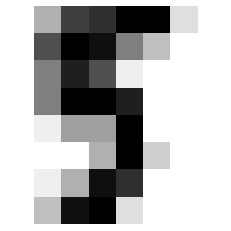

In [90]:
import matplotlib.pyplot as plt
import matplotlib as mlt

plt.imshow(some_digit, cmap=mlt.cm.binary, interpolation='nearest')

plt.axis('off')

plt.show()

In [91]:
X[18][4]

13.0

In [92]:
print(mnist['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [93]:
type(y[1])

numpy.int64

In [94]:
X_train, y_train  = X[:1500], y[:1500]
X_test, y_test = X[1500:], y[1500:]


# Binary Classifier

In [95]:
#Identifying if it the digit 5 or not
#Labels have to be binary (0 or 1)
y_train_5 = (y_train == 5)
#Gives a 1-d array of 0's and 1's
y_train_5

array([False, False, False, ..., False, False, False])

In [104]:
#Picking up stochiastic gradient descent classifier(performs faster than batch gradient descent classifier)
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [105]:
sgd_clf.predict(some_digit.reshape(1,-1))

array([ True])

In [116]:
#Cross validation own code

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3,random_state=42,shuffle=True)

for train_index, valid_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    
    X_train_folds = X_train[train_index]
    y_train_folds = y_train[train_index]
    X_valid_folds = X_train[valid_index]
    y_valid_folds = y_train[valid_index]  
    clone_clf

[   1    2    3    4    5    6    7    8    9   11   13   14   15   16
   20   21   24   26   27   28   31   32   33   34   36   37   38   39
   44   45   46   47   51   53   54   55   56   58   61   64   65   66
   67   68   69   70   71   75   76   77   79   81   82   84   86   87
   88   89   90   92   93   94   95   96   97   98   99  100  101  103
  104  105  106  107  108  109  111  112  114  115  116  117  118  119
  120  123  125  126  131  132  134  137  138  140  142  143  144  145
  146  147  150  153  156  158  159  160  161  162  163  164  165  166
  167  168  169  170  172  173  174  176  179  181  182  183  184  186
  187  188  189  191  192  193  194  195  196  199  200  201  202  203
  204  205  206  207  209  212  214  215  217  219  222  223  224  225
  227  228  231  233  235  236  238  239  243  244  245  246  247  249
  251  252  253  254  255  256  257  263  264  265  266  267  268  270
  272  273  275  276  278  279  282  284  285  286  287  289  290  292
  294 